The data was taken from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970.

Dataset attributes:
- CRIM: per capita crime rate by town  
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to ﬁve Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per $10,000
- PTRATIO: pupil-teacher ratio by town 12. 
- B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13. 
- LSTAT: % lower status of the population
- MEDV: Median value of owner-occupied homes in $1000s

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

dataset = pd.read_csv("data/boston.csv")
data = dataset.copy()

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
data.shape

(506, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

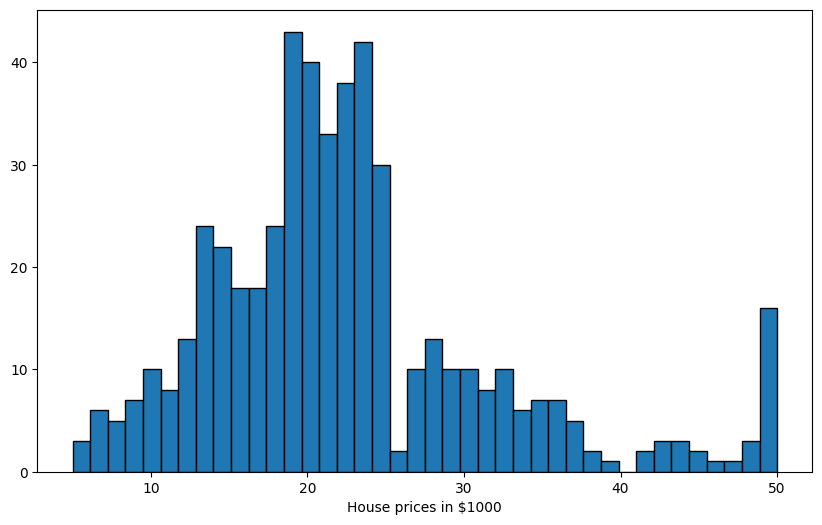

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(data["MEDV"], bins=40, ec="black")
plt.xlabel("House prices in $1000")
plt.show()

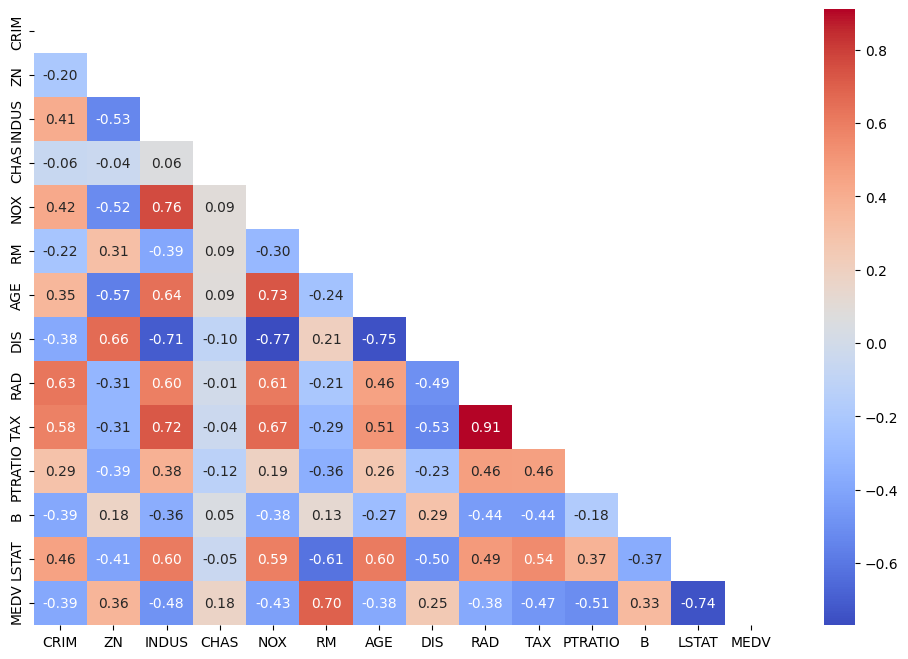

In [9]:
# Correlation matrix
plt.figure(figsize=(12,8))
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
sns.heatmap(data.corr(), mask=mask, cmap="coolwarm", annot=True, fmt=".2f")
plt.show()

In [10]:
corr = data.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)[14:28:2]

TAX    RAD      0.910228
NOX    DIS      0.769230
INDUS  NOX      0.763651
AGE    DIS      0.747881
MEDV   LSTAT    0.737663
NOX    AGE      0.731470
TAX    INDUS    0.720760
dtype: float64

In [11]:
# we can check the normality and skewness of each variables.
# If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.
# If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed.
# If the skewness is less than -1 or greater than 1, the data are highly skewed.
# We should deal with the skewness in the data before training the model with methods like log transformation, square root transformation, etc.

data.skew().sort_values(ascending = False)

CRIM       5.223149
CHAS       3.405904
ZN         2.225666
MEDV       1.108098
DIS        1.011781
RAD        1.004815
LSTAT      0.906460
NOX        0.729308
TAX        0.669956
RM         0.403612
INDUS      0.295022
AGE       -0.598963
PTRATIO   -0.802325
B         -2.890374
dtype: float64

In [12]:
# Let's fix CRIM, ZN skewness with log transformation
data["CRIM"] = np.log1p(data["CRIM"])
data["CHAS"] = np.log1p(data["CHAS"])
data["ZN"] = np.log1p(data["ZN"])

In [13]:
data.skew().sort_values(ascending = False)

CHAS       3.405904
CRIM       1.269201
ZN         1.193451
MEDV       1.108098
DIS        1.011781
RAD        1.004815
LSTAT      0.906460
NOX        0.729308
TAX        0.669956
RM         0.403612
INDUS      0.295022
AGE       -0.598963
PTRATIO   -0.802325
B         -2.890374
dtype: float64

Modelling

In [14]:
# splitting X and y
X = data.drop(columns=["MEDV"], axis=1)
y = data["MEDV"]

In [19]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

# normalizing the data
X = pd.DataFrame(mms.fit_transform(X), columns = X.columns)


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=42)

In [25]:
def draw_chart(y_test, y_pred):
   fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# scatter plot for the actual and predicted prices
   axes[0].scatter(y_test, y_pred, marker='o')
   axes[0].set_xlabel("Actual House Prices ($1000)")
   axes[0].set_ylabel("Predicted House Prices: ($1000)")
   axes[0].set_xticks(range(0, int(max(y_test)), 2))
   axes[0].set_yticks(range(0, int(max(y_pred)), 2))
   axes[0].grid(color='lightgray', linestyle='-')
   x = np.linspace(*axes[0].get_xlim())
   axes[0].plot(x, x, color='red')   
   
   axes[0].set_axisbelow(True)
   axes[0].set_title("Actual Prices vs Predicted prices")
# scatter plot for the residuals
   axes[1].scatter(y_pred, (y_test - y_pred), c='orange', marker='o')
   axes[1].set_xlabel("Predicted House Prices: ($1000)")
   axes[1].set_ylabel("Residuals: Actual - Predicted House Prices: ($1000)")
   axes[1].axhline(y=0, color='k', linestyle='--')
   axes[1].set_title("Residuals vs Fitted Values")

   plt.show()

5.008736765886047


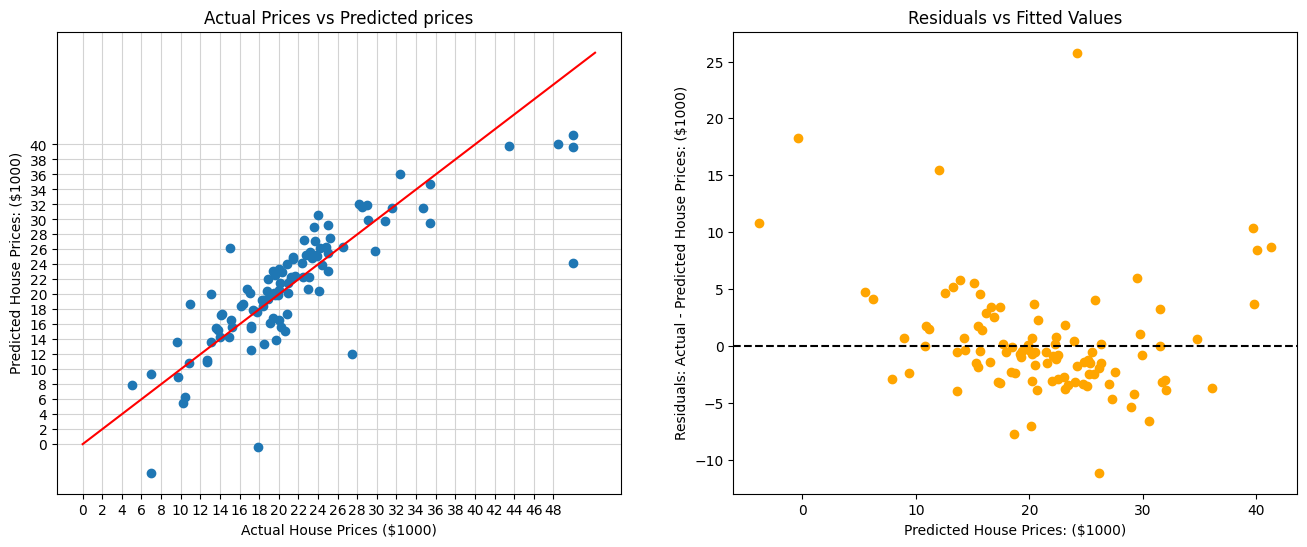

In [26]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
# Predicting values
y_pred = lr.predict(X_test)

# Evaluation metrics "Mean Squared Error"
mae_lr = np.sqrt(mean_squared_error(y_test, y_pred))
print(mae_lr)

draw_chart(y_test, y_pred)

2.9043643950468208


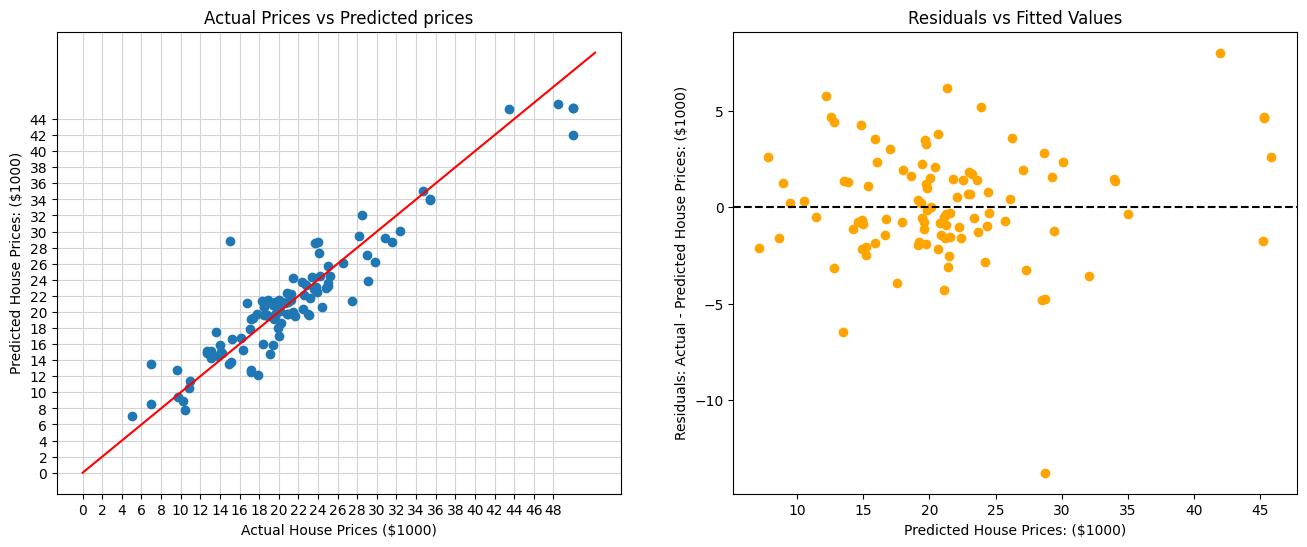

In [28]:
# random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
# Predicting values
y_pred = rf.predict(X_test)

# Evaluation metrics "Mean Squared Error"
mae_rf = np.sqrt(mean_squared_error(y_test, y_pred))
print(mae_rf)
draw_chart(y_test, y_pred)

2.62854171840299


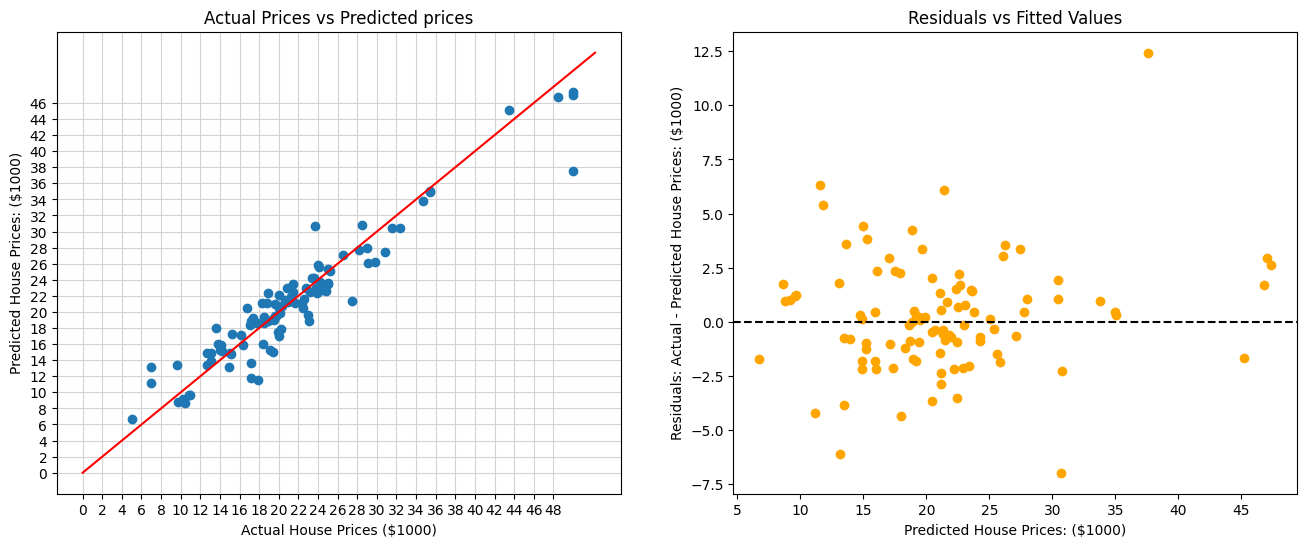

In [29]:
# XGBoost
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
# Predicting values
y_pred = xgb.predict(X_test)

# Evaluation metrics "Mean Squared Error"
mae_xgb = np.sqrt(mean_squared_error(y_test, y_pred))
print(mae_xgb)
draw_chart(y_test, y_pred)

Learning rate set to 0.03548
0:	learn: 9.1085903	total: 156ms	remaining: 2m 35s
1:	learn: 8.9081343	total: 157ms	remaining: 1m 18s
2:	learn: 8.7181254	total: 160ms	remaining: 53.2s
3:	learn: 8.5522237	total: 163ms	remaining: 40.5s
4:	learn: 8.4054256	total: 165ms	remaining: 32.8s
5:	learn: 8.2385834	total: 167ms	remaining: 27.6s
6:	learn: 8.0755926	total: 169ms	remaining: 23.9s
7:	learn: 7.9205813	total: 171ms	remaining: 21.1s
8:	learn: 7.7783212	total: 173ms	remaining: 19s
9:	learn: 7.6187846	total: 176ms	remaining: 17.4s
10:	learn: 7.4851258	total: 178ms	remaining: 16s
11:	learn: 7.3316461	total: 180ms	remaining: 14.8s
12:	learn: 7.1844025	total: 182ms	remaining: 13.8s
13:	learn: 7.0423286	total: 184ms	remaining: 13s
14:	learn: 6.9135536	total: 186ms	remaining: 12.2s
15:	learn: 6.7833479	total: 189ms	remaining: 11.6s
16:	learn: 6.6557453	total: 191ms	remaining: 11s
17:	learn: 6.5347222	total: 193ms	remaining: 10.5s
18:	learn: 6.4206435	total: 195ms	remaining: 10.1s
19:	learn: 6.30550

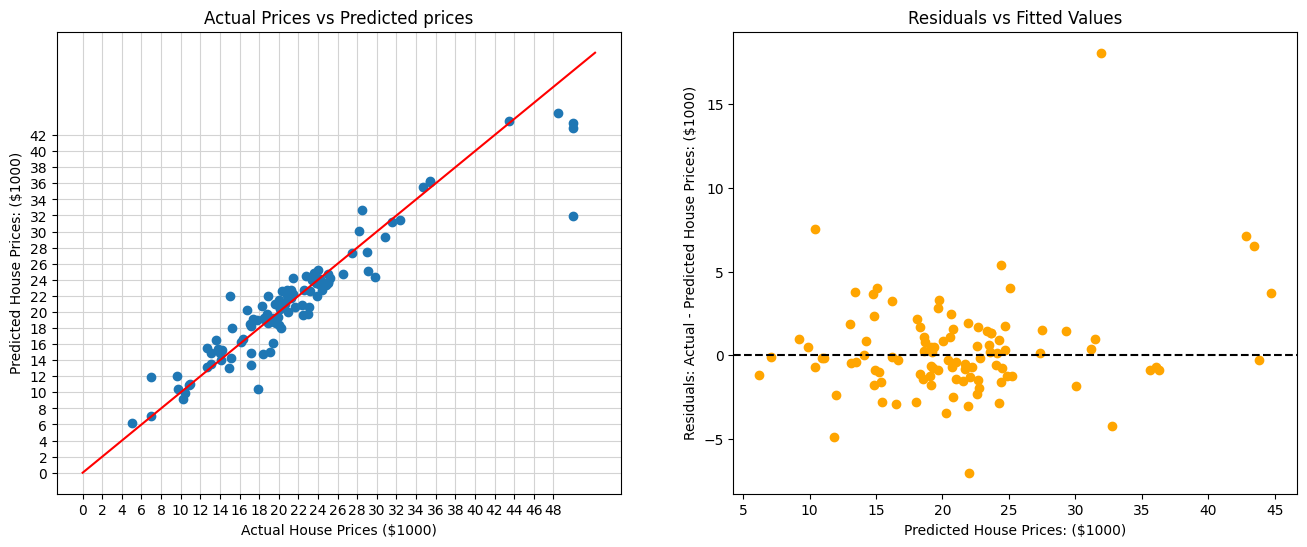

In [30]:
# catboost
from catboost import CatBoostRegressor
cat = CatBoostRegressor()
cat.fit(X_train, y_train)
# Predicting values
y_pred = cat.predict(X_test)

# Evaluation metrics "Mean Squared Error"
mae_cat = np.sqrt(mean_squared_error(y_test, y_pred))
print(mae_cat)
draw_chart(y_test, y_pred)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000821 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1027
[LightGBM] [Info] Number of data points in the train set: 404, number of used features: 13
[LightGBM] [Info] Start training from score 22.796535
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

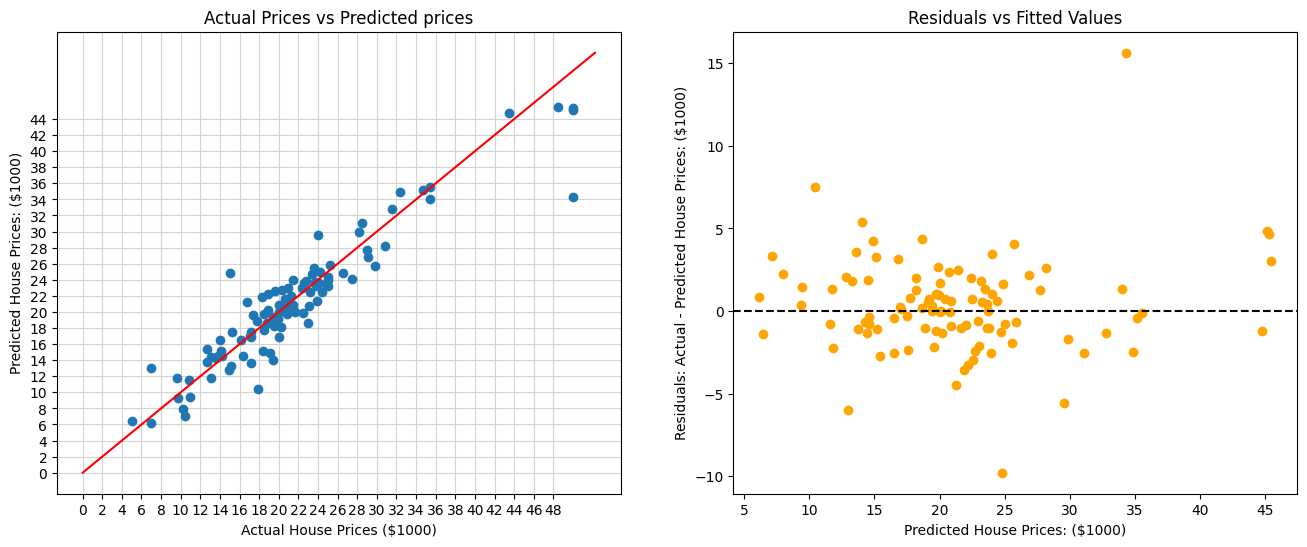

In [31]:
# lightgbm
from lightgbm import LGBMRegressor
lgb = LGBMRegressor()
lgb.fit(X_train, y_train)
# Predicting values
y_pred = lgb.predict(X_test)

# Evaluation metrics "Mean Squared Error"
mae_lgb = np.sqrt(mean_squared_error(y_test, y_pred))

print(mae_lgb)
draw_chart(y_test, y_pred)

In [32]:
# Summary:
results = pd.DataFrame({
    'Model':['Linear Regression', 'Random Forest', 'XGBoost', "CatBoost", "LightGBM"],
    'MAE' :[mae_lr, mae_rf, mae_xgb, mae_cat, mae_lgb],
    'MSE': [mean_squared_error(y_test, lr.predict(X_test)), mean_squared_error(y_test, rf.predict(X_test)), mean_squared_error(y_test, xgb.predict(X_test)), mean_squared_error(y_test, cat.predict(X_test)), mean_squared_error(y_test, lgb.predict(X_test))],
    'R-squared': [lr.score(X_test, y_test), rf.score(X_test, y_test), xgb.score(X_test, y_test), cat.score(X_test, y_test), lgb.score(X_test, y_test)]
}).sort_values(by='MAE').reset_index(drop=True)
print(results)

               Model       MAE        MSE  R-squared
0            XGBoost  2.628542   6.909232   0.905784
1      Random Forest  2.904364   8.435333   0.884973
2           CatBoost  2.922124   8.538809   0.883562
3           LightGBM  2.936984   8.625874   0.882375
4  Linear Regression  5.008737  25.087444   0.657901
